# High Noise : ChatGPT Fine Tuning

In [1]:
import numpy as np
import pandas as pd
import config
import jupyter_service
import sys
import matplotlib.pyplot as plt
from dbcontext import Context
from wordcloud import WordCloud, ImageColorGenerator
pd.options.display.float_format = '{:.2f}'.format
print(sys.version, np.__version__, pd.__version__, config.version)
context = Context()
context.create(echo=False)
service = jupyter_service.JupyterService(context)
nb_form=15854
pd.set_option('max_colwidth', 1000)
print(config.connection_string)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)] 2.0.2 2.2.3 0.1.0.Beta
postgresql://postgres:sa@localhost:5432/yt1


In [2]:
question_nb = 12

In [33]:
empathy_category = "f"
df = service.get_highlevel_linked(question_nb, empathy_category, True)
df

,id,main_topic,score,topic0_id,topic1_id,topic1,topic2_id,topic2,explaination
0,50,peace,1.00,34177,30719,peace,0,None,"Fantasy evokes imagination, creativity, and escapism, while peace brings harmony, tranquility, and unity among individuals and communities."
1,49,happiness,1.00,34176,30734,happiness,0,None,"Fantasy ignites imagination, sparks joy, fuels dreams, fosters creativity, encourages escapism, and cultivates hope for a brighter future."
2,56,health,0.95,34183,30784,health,0,None,"Fantasy promotes creativity and imagination, enhancing mental health, reducing stress, and fostering resilience through escapism and storytelling."
3,48,personal growth,0.95,34175,30872,personal,30851,growth,"Fantasy inspires imagination and creativity, while personal growth fosters self-awareness, resilience, and a journey towards realizing one's potential."
4,60,educational aspirations,0.90,34187,33579,educational,32164,aspirations,"Fantasy sparks imagination, creativity fosters innovation, and educational aspirations inspire growth, opening pathways to knowledge and personal development."
5,53,equality,0.90,34180,30721,equality,0,None,"Fantasy fosters imagination, creativity, and diverse worlds, while equality promotes fairness, inclusivity, and justice for all individuals."
6,61,career success,0.90,34188,30701,career,30801,success,"Imagination fuels innovation, determination drives achievement, collaboration enhances growth, and passion ignites purpose in fantasy and career journeys."
7,51,family,0.90,34178,30818,family,0,None,"Fantasy fosters imagination, creativity, adventure, and wonder, while family brings love, support, connection, and shared experiences."
8,62,financial stability,0.85,34189,30907,financial,31030,stability,"Fantasy fosters creativity and imagination, while financial stability ensures security and freedom to pursue dreams and aspirations."
9,52,sustainability,0.85,34179,30761,sustainability,0,None,"Fantasy encourages creativity and imagination, while sustainability promotes harmony with nature and responsible resource use for future generations."


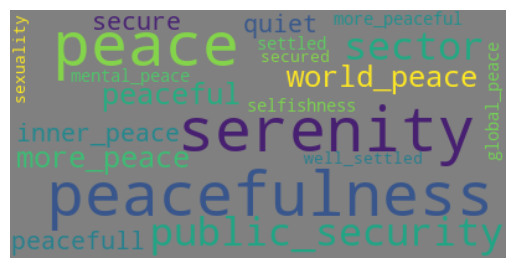

In [36]:
topic1 = df.topic1[0]
if topic1 is not None:
    df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
    df_lema3 = service.get_lemas(topic1, "textrank")
topic2 = df.topic2[0]
if topic2 is not None:
   df_lema2 = service.get_lemas(topic1, "gpt-4o-mini")
df_lema = pd.concat([df_lema1, df_lema2, df_lema3], ignore_index=True)
service.show_lemas(df_lema)

In [15]:
empathy_category = "pd"
df = service.get_highlevel_linked(question_nb, empathy_category, False)
df

,id,main_topic,score,topic0_id,topic1_id,topic1,topic2_id,topic2,explaination
0,18,poverty,0.95,34145,30772,poverty,0,None,"Personal distress often involves anxiety, depression, hopelessness, while poverty entails deprivation, instability, and social exclusion."
1,63,climate change,0.95,34190,30795,climate,0,None,"Personal distress from climate change includes anxiety, grief, helplessness, hopelessness, burnout, and eco-anxiety, affecting mental well-being."
2,88,environmental deterioration,0.90,34215,30988,environmental,0,None,"Personal distress includes anxiety, depression, and trauma; environmental deterioration encompasses pollution, habitat loss, and climate change impacts."
3,91,political conflict,0.90,34218,0,None,30711,conflict,"Personal distress can involve anxiety, depression, and turmoil, while political conflict often leads to division, violence, and social instability."
4,15,discrimination,0.85,34142,30869,discrimination,0,None,"Personal distress refers to emotional suffering, while discrimination involves unfair treatment based on identity, leading to social exclusion."
5,89,social injustice,0.85,34216,31170,social,32271,injustice,"Personal distress refers to individual suffering, while social injustice denotes systemic inequalities and unfair treatment in society."
6,92,unstable world conditions,0.80,34219,0,None,30740,world,"Personal distress includes anxiety, depression, and trauma; unstable world conditions involve conflict, crises, uncertainty, and social unrest."
7,66,lack of opportunity,0.80,34193,33290,lack,0,None,"Personal distress and lack of opportunity lead to feelings of hopelessness, frustration, isolation, and diminished self-worth."
8,87,financial insecurity,0.80,34214,30907,financial,30865,insecurity,"Personal distress includes anxiety and depression; financial insecurity involves instability, debt, and inability to meet basic needs."
9,90,mental health issues,0.75,34217,31342,mental,30784,health,"Negative terms include stigma, isolation, shame, burnout, anxiety, depression, and crisis, impacting wellbeing and social support."


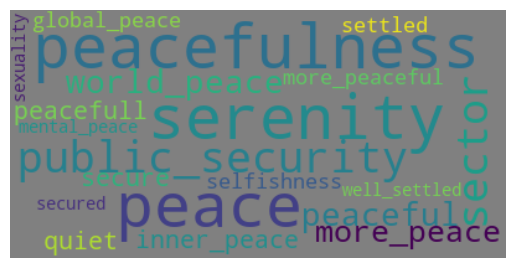

In [37]:
topic1 = df.topic1[0]
if topic1 is not None:
    df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
    df_lema3 = service.get_lemas(topic1, "textrank")
topic2 = df.topic2[0]
if topic2 is not None:
   df_lema2 = service.get_lemas(topic1, "gpt-4o-mini")
df_lema = pd.concat([df_lema1, df_lema2, df_lema3], ignore_index=True)
service.show_lemas(df_lema)